<a href="https://colab.research.google.com/github/Shrikant06112002/Plant-Leaf-Disease-Predication/blob/main/Plant_leaf_disease_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/archive (3).zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/ML_Project2')

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions


In [ ]:
os.listdir("/content/drive/MyDrive/ML_Project2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train")

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
len(os.listdir("/content/drive/MyDrive/ML_Project2/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab"))

2016

In [ ]:
len(os.listdir("/content/drive/MyDrive/ML_Project2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy"))

2008

In [ ]:
len(os.listdir("/content/drive/MyDrive/ML_Project2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [ ]:
len(os.listdir("/content/drive/MyDrive/ML_Project2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"))

38

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip=False, preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/ML_Project2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train" ,
                                          target_size=(256,256) ,
                                          batch_size=32)

val = val_datagen.flow_from_directory(directory="/content/drive/MyDrive/ML_Project2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid" ,
                                      target_size=(256,256) ,
                                      batch_size=32)

Found 70295 images belonging to 38 classes.


In [ ]:
t_img , label = train.next()

In [ ]:
def plotImage(img_arr , label):
    for im , l in zip(img_arr, label):
        plt.figure(figsize=(5,5))
        plt.imshow(im/255)
        plt.show()

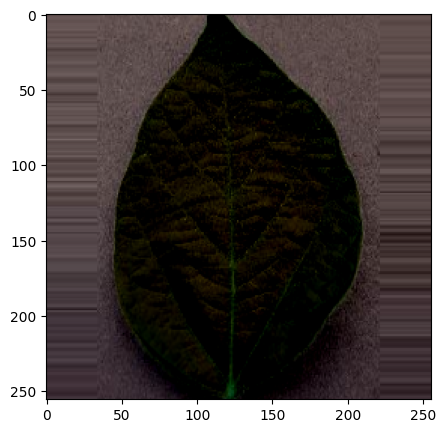

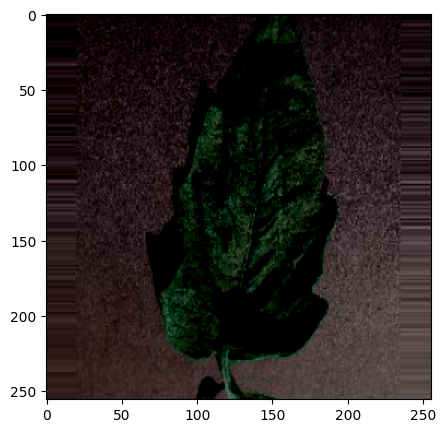

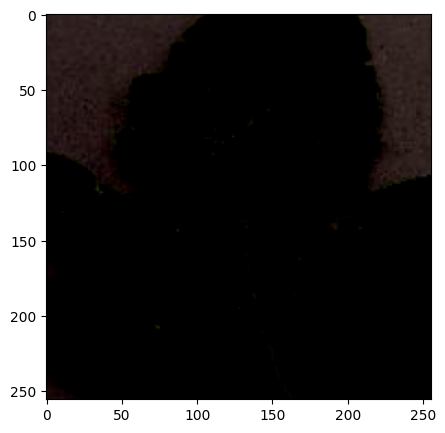

In [ ]:
plotImage(t_img[:3],label[:3])

Buliding Our **Model**

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape=(256,256,3) , include_top = False)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
X = Flatten()(base_model.output)

In [ ]:
X = Dense(units=38,activation='softmax')(X)

#creating our model
model = Model(base_model.input,X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

Early Stopping and Model Check point

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint , EarlyStopping

#early stopping
es = EarlyStopping(monitor = 'val_accuracy' ,
              min_delta =0.01 ,
               patience =3,
                verbose=1)

#model check point
mc = ModelCheckpoint(filepath="best_model.h5",
                     monitor = 'val_accuracy' ,
                     min_delta =0.01 ,
                     patience =3,
                     verbose=1 ,
                     save_best_only =True )

cb = [es,mc]

In [ ]:
his = model.fit(train,
                steps_per_epoch=16,
                epochs=50,
                verbose=1,
                callbacks=cb,
                validation_data=val,
                validation_steps=16)

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 24.5710 - accuracy: 0.2129 
Epoch 1: val_accuracy improved from -inf to 0.42773, saving model to best_model.h5
16/16 [==============================] - 1069s 68s/step - loss: 24.5710 - accuracy: 0.2129 - val_loss: 12.6841 - val_accuracy: 0.4277


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 13.6107 - accuracy: 0.4219 
Epoch 2: val_accuracy improved from 0.42773 to 0.57617, saving model to best_model.h5
16/16 [==============================] - 1068s 68s/step - loss: 13.6107 - accuracy: 0.4219 - val_loss: 9.1789 - val_accuracy: 0.5762
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 11.2146 - accuracy: 0.5449 
Epoch 3: val_accuracy improved from 0.57617 to 0.63477, saving model to best_model.h5
16/16 [==============================] - 1107s 71s/step - loss: 11.2146 - accuracy: 0.5449 - val_loss: 8.0050 - val_accuracy: 0.6348
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 10.6780 - accuracy: 0.5703 
Epoch 4: val_accuracy improved from 0.63477 to 0.72070, saving model to best_model.h5
16/16 [==============================] - 1106s 71s/step - loss: 10.6780 - accuracy: 0.5703 - val_loss: 6.1710 - val_accuracy: 0.7207
Epoch 5/50
16/16 [==============================] - ETA

In [ ]:
h = his.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

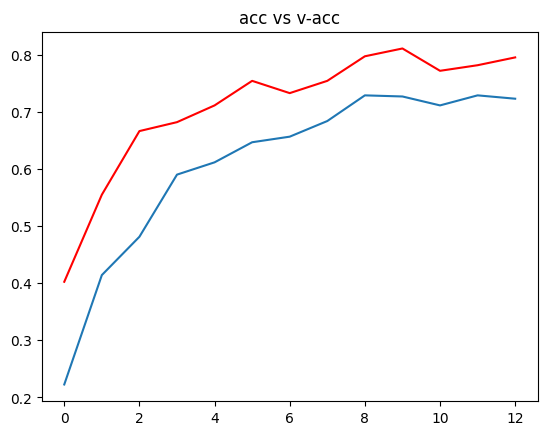

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c="red")
plt.title("acc vs v-acc")
plt.show()


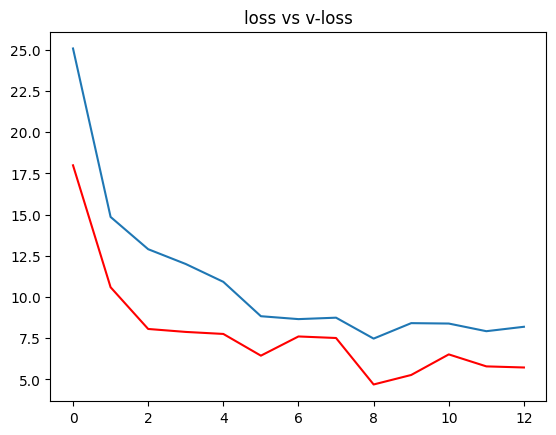

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c="red")
plt.title("loss vs v-loss")
plt.show()

Load Best Model


In [ ]:
from keras.models import load_model

In [ ]:
model = load_model("/content/best_model.h5")

In [ ]:
acc = model.evaluate_generator(val)[1]

print(f"The accuracy of your model is = {acc*100} %")

<ipython-input-47-3dd475e0eb34>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val)[1]


The accuracy of your model is = 79.60391640663147 %


In [ ]:
ref = dict(zip(list(train.class_indices.values()) , list(train.class_indices.keys())))

In [ ]:
def prediction(path):

    # Load and preprocess the image
    img = load_img(path, target_size=(256, 256))
    i = img_to_array(img)
    im = preprocess_input(i)
    img = np.expand_dims(im, axis=0)
   # Normalize the image data to the [0, 1] range
    img /= 255.0
    # Make a prediction
    pred = np.argmax(model.predict(img))

    # Map the prediction to the class label using a reference list (ref)
    predicted_class = ref[pred]

    # Display the image
    plt.imshow(img[0])
    plt.title(f"Predicted Class: {predicted_class}")
    plt.show()

    print(f"The image belongs to {predicted_class}")
       # Check if the class name contains the word "healthy"
    if "healthy" in predicted_class.lower():
        print("The plant is healthy")
    else:
        print(f"The image belongs to {predicted_class}")

1/1 [==============================] - 0s 26ms/step


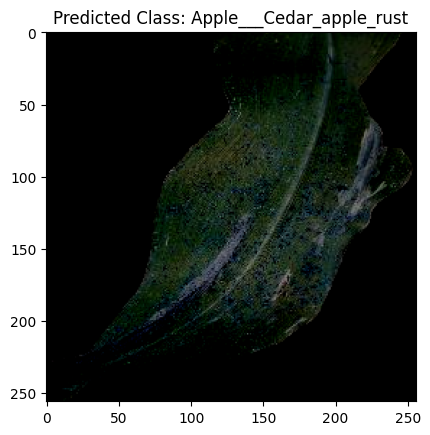

The image belongs to Apple___Cedar_apple_rust


In [ ]:
path = "/content/drive/MyDrive/ML_Project2/test/test/CornCommonRust1.JPG"

prediction(path)

1/1 [==============================] - 0s 20ms/step


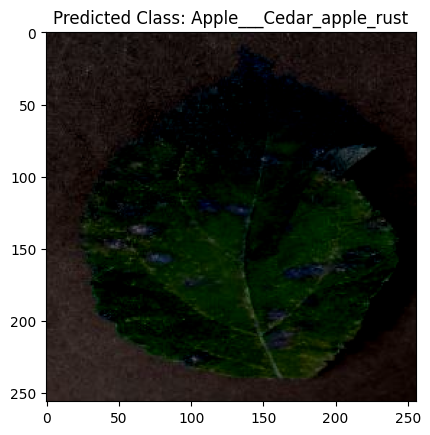

The image belongs to Apple___Cedar_apple_rust
The image belongs to Apple___Cedar_apple_rust


In [ ]:
path = "/content/drive/MyDrive/ML_Project2/test/test/AppleCedarRust4.JPG"

prediction(path)

1/1 [==============================] - 0s 23ms/step


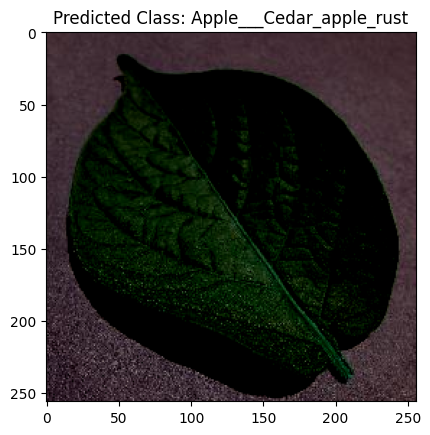

The image belongs to Apple___Cedar_apple_rust
The image belongs to Apple___Cedar_apple_rust


In [ ]:
path = "/content/drive/MyDrive/ML_Project2/test/test/PotatoHealthy1.JPG"

prediction(path)

1/1 [==============================] - 0s 20ms/step


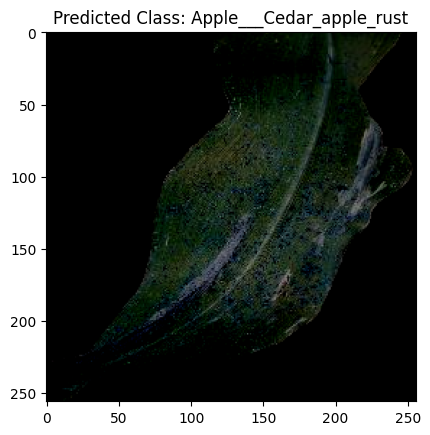

The image belongs to Apple___Cedar_apple_rust


In [ ]:
path = "/content/drive/MyDrive/ML_Project2/test/test/CornCommonRust1.JPG"

prediction(path)